In [3]:
import logging

logging.basicConfig(level=logging.DEBUG, format='%(message)s')

logging.debug('Hello Debug')
logging.info('Hello Info')
logging.warning('Hello Warning')
logging.error('Hello Error')
logging.critical('Hello Critical')

Hello Debug
Hello Info
Hello Warning
Hello Error
Hello Critical


In [4]:
from svm import *
from svmutil import *
import numpy as np
import math

In [5]:
#label, dataset = svm_read_problem('../heart_scale')

In [6]:
label, dataset = svm_read_problem('toydatarbf.dat')

logging.debug("Length of label: {}".format(len(label)))
logging.debug("Label: {}".format(label))
logging.debug("Length of data: {}".format(len(dataset)))
logging.debug("Data: {}".format(dataset))

Length of label: 87
Label: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
Length of data: 87
Data: [{1: 0.202, 2: 0.454}, {1: 0.27, 2: 0.374}, {1: 0.276, 2: 0.304}, {1: 0.276, 2: 0.268}, {1: 0.278, 2: 0.218}, {1: 0.378, 2: 0.18}, {1: 0.412, 2: 0.226}, {1: 0.382, 2: 0.332}, {1: 0.368, 2: 0.284}, {1: 0.326, 2: 0.38}, {1: 0.3, 2: 0.514}, {1: 0.142, 2: 0.426}, {1: 0.21, 2: 0.294}, {1: 0.202, 2: 0.246}, {1: 0.308, 2: 0.17}, {1: 0.496, 2: 0.18}, {1: 0.424, 2: 0.254}, {1: 0.342, 2: 0.24}, {1: 0.314, 2: 0.306}, {1: 0.304, 2: 0.432}, {1: 0.216, 2: 0.38}, {1: 0.274, 2: 0.448}, {1: 0.636, 2: 0.366}, {1: 0.514, 2: 0

In [7]:
maxdim = np.max(np.array([len(d_item) for d_item in dataset]))
for data_idx, _ in enumerate(dataset):
    for dim_idx in range(maxdim):
        if dim_idx + 1 not in dataset[data_idx]:
            print("add key {} in data {}".format(dim_idx+1, data_idx))
            dataset[data_idx][dim_idx+1] = 0

In [8]:
logging.debug("Length of Data: {}, Dimension of Data: {}".format(len(dataset), len(dataset[0])))
#logging.debug("Read Data in One Line:\n{}".format(
#    np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) 
#              for dim_idx, feat_idx in enumerate(data_list)]).reshape(len(dataset), len(dataset[0]))))

Length of Data: 87, Dimension of Data: 2


In [101]:
import time

gamma = 2
C_cost = 100
start_time = time.time()
model = svm_train(label[:400], dataset[:400], '-s 0 -t 2 -g {} -c {}'.format(gamma, C_cost))
end_time = time.time()
print("Time = {} sec".format(end_time - start_time))

#p_label, p_acc, p_val = svm_predict(y[200:], x[200:], model)
# using the same data set as training, just for development stage
p_label, p_acc, p_val = svm_predict(label[:400], dataset[:400], model)
logging.debug("Accuracy: {}".format(p_acc))
logging.debug("Output Label: {}".format(p_label))
logging.debug("Model Value: {}".format(p_val))

yi =np.array([1 if val >= 0 else -1 for [val] in p_val])
logging.debug("Yi(+1/-1): {}".format(yi))

Accuracy: (100.0, 0.0, 1.0)
Output Label: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
Model Value: [[2.726665515743606], [3.125796072646723], [3.947341238947652], [4.327055282946711], [4.730299244365819], [4.129394585939034], [3.586352212175663], [2.81325045748313], [3.4832576382339453], [2.607149573308129], [1.0624685654455148], [3.5670908158722425], [4.483036779449785], [4.969095303313582], [4.766037952096264], [2.818501578422038], [3.2753047100761505], [4.098045440771779], [3.6534079446005534], [2.065390585254755], [3.4670297334163904], [2.1196369603463565], [0.2377544786581267], [2.237280972096664

Time = 0.010779142379760742 sec
Accuracy = 100% (87/87) (classification)


In [102]:
svm_type = model.get_svm_type()
logging.debug("SVM Type: {}".format(svm_type))

nr_class = model.get_nr_class()
logging.debug("Number of Class: {}".format(nr_class))

svr_probability = model.get_svr_probability()
logging.debug("SVM Probability: {}".format(svr_probability))

class_labels = model.get_labels()
logging.debug("Class Labels: {}".format(class_labels))

sv_indices = model.get_sv_indices()
logging.debug("Support Vectors Indices: {}".format(sv_indices))

nr_sv = model.get_nr_sv()
logging.debug("Number of Support Vectors: {}".format(nr_sv))

is_prob_model = model.is_probability_model()
logging.debug("Is Probability Model: {}".format(is_prob_model))

support_vector_coefficients = model.get_sv_coef()
logging.debug("Support Vector Coefficients: {}".format(support_vector_coefficients))

support_vectors = model.get_SV()
logging.debug("Support Vectors: {}".format(support_vectors))

SVM Type: 0
Number of Class: 2
SVM Probability: 0.0
Class Labels: [2, 3]
Support Vectors Indices: [23, 26, 27, 67, 69, 74, 60, 61, 62, 63, 76, 79]
Number of Support Vectors: 12
Is Probability Model: False
Support Vector Coefficients: [(100.0,), (50.84651768709266,), (22.150110642132468,), (72.04389319804261,), (100.0,), (100.0,), (-79.67895209435864,), (-95.40447406406483,), (-100.0,), (-2.220674146540539,), (-67.7364212223038,), (-100.0,)]
Support Vectors: [{1: 0.636, 2: 0.366}, {1: 0.476, 2: 0.41}, {1: 0.564, 2: 0.354}, {1: 0.24, 2: 0.634}, {1: 0.342, 2: 0.844}, {1: 0.686, 2: 0.244}, {1: 0.476, 2: 0.554}, {1: 0.388, 2: 0.652}, {1: 0.342, 2: 0.672}, {1: 0.384, 2: 0.714}, {1: 0.782, 2: 0.292}, {1: 0.688, 2: 0.132}]


In [103]:
for data_idx, _ in enumerate(support_vectors):
    for dim_idx in range(maxdim):
        if dim_idx + 1 not in support_vectors[data_idx]:
            print("add key {} in support_vectors {}".format(dim_idx+1, data_idx))
            support_vectors[data_idx][dim_idx+1] = 0

In [104]:
for sv_idx, data_idx in enumerate(sv_indices):
    logging.debug("Support Vector Indices: {}, Data Indices: {}".format(sv_idx, data_idx))
    logging.debug("Support Vectors from SV: {}, Support Vectors Coeff: {}, Support Vectors from Data: {}, Yi: {}, Model Output: {}".format(
        support_vectors[sv_idx], support_vector_coefficients[sv_idx], dataset[data_idx-1], yi[data_idx-1], p_val[data_idx-1]))
    
for i in support_vectors:
    logging.debug("Support Vectors from SV: {}".format(i))

for i in support_vector_coefficients:
    logging.debug("Support Vectors Coeff: {}".format(i))

Support Vector Indices: 0, Data Indices: 23
Support Vectors from SV: {1: 0.636, 2: 0.366}, Support Vectors Coeff: (100.0,), Support Vectors from Data: {1: 0.636, 2: 0.366}, Yi: 1, Model Output: [0.2377544786581267]
Support Vector Indices: 1, Data Indices: 26
Support Vectors from SV: {1: 0.476, 2: 0.41}, Support Vectors Coeff: (50.84651768709266,), Support Vectors from Data: {1: 0.476, 2: 0.41}, Yi: 1, Model Output: [0.9998337639201309]
Support Vector Indices: 2, Data Indices: 27
Support Vectors from SV: {1: 0.564, 2: 0.354}, Support Vectors Coeff: (22.150110642132468,), Support Vectors from Data: {1: 0.564, 2: 0.354}, Yi: 1, Model Output: [1.0002348273531623]
Support Vector Indices: 3, Data Indices: 67
Support Vectors from SV: {1: 0.24, 2: 0.634}, Support Vectors Coeff: (72.04389319804261,), Support Vectors from Data: {1: 0.24, 2: 0.634}, Yi: 1, Model Output: [1.0002322703680107]
Support Vector Indices: 4, Data Indices: 69
Support Vectors from SV: {1: 0.342, 2: 0.844}, Support Vectors 

In [105]:
f1mean = np.mean(np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]))
f2mean = np.mean(np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]))

print("feature 1 mean: {}".format(f1mean))
print("feature 2 mean: {}".format(f2mean))

feature 1 mean: 0.5316321839080459
feature 2 mean: 0.483816091954023


In [106]:
def rfb(vec_x1, vec_x2):
    return(math.exp(-(gamma * np.dot(vec_x1-vec_x2, vec_x1-vec_x2))))

def wtxrbf(value):
    result = 0
    for sv_idx, data_idx in enumerate(sv_indices):
        #logging.debug("Coeff: {:30}, SV: {:20}, {:20}".format(support_vector_coefficients[sv_idx][0], support_vectors[sv_idx][1], support_vectors[sv_idx][2]))
        result = result + support_vector_coefficients[sv_idx][0]*rfb(np.array([support_vectors[sv_idx][1], support_vectors[sv_idx][2]]), value)
    return result

w1, w2 = 0.0, 0.0
for sv_idx, data_idx in enumerate(sv_indices):
    w1 = w1 + support_vector_coefficients[sv_idx][0]*rfb(support_vectors[sv_idx][1], f1mean)
    w2 = w2 + support_vector_coefficients[sv_idx][0]*rfb(support_vectors[sv_idx][2], f2mean)
    
logging.debug("w1: {}, w2: {}".format(w1, w2))

w0 = 0.0
for sv_idx, data_idx in enumerate(sv_indices):
    sign_flag = 1 if support_vector_coefficients[sv_idx][0] > 0 else -1
    logging.debug("Yi: {}, WtXi: {}".format(
        sign_flag,
        wtxrbf(np.array([support_vectors[sv_idx][1], support_vectors[sv_idx][2]]))))
    w0 = w0 + sign_flag - wtxrbf(np.array([support_vectors[sv_idx][1], support_vectors[sv_idx][2]]))
    print(w0)
    
print(nr_sv)
w0 = w0 / nr_sv
logging.debug("w0 = {}".format(w0))

w1: -1.2416880062287134, w2: -1.096196967191446
Yi: 1, WtXi: -1.3132160515999658
Yi: 1, WtXi: -0.5511367663379616
Yi: 1, WtXi: -0.5507357029049302
Yi: 1, WtXi: -0.5507382598900818
Yi: 1, WtXi: -0.8093195129399895
Yi: 1, WtXi: -1.3273792530915216
Yi: -1, WtXi: -2.5514925614898587
Yi: -1, WtXi: -2.5505017103686143
Yi: -1, WtXi: -2.029217467016281
Yi: -1, WtXi: -2.551077295419354


2.313216051599966
3.8643528179379274
5.415088520842858
6.9658267807329395
8.775146293672929
11.10252554676445
12.65401810825431
14.204519818622924
15.233737285639204


Yi: -1, WtXi: -2.5511170177897498
Yi: -1, WtXi: -1.8646457576299156
w0 = 1.600048113039852


16.78481458105856
18.33593159884831
19.200577356478224
12


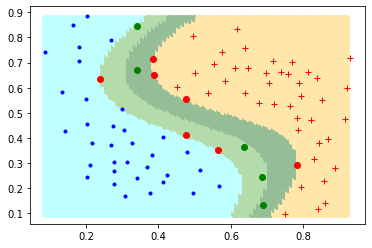

In [107]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(20,15))
plt.cla()

plot_x = np.arange(
    np.min([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]),
    np.max([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]),
    0.01)
plot_y = np.arange(
    np.min([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]),
    np.max([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]),
    0.01)

for x_point in plot_x:
    for y_point in plot_y:
        fun_value = wtxrbf(np.array([x_point, y_point])) + w0
        if fun_value >= 1:
            plt.plot(x_point, y_point, "o", color='#beffff')
        elif fun_value >=0 and fun_value < 1:
            plt.plot(x_point, y_point, "o", color='#b4dcaa')
        elif fun_value >-1 and fun_value < 0:
            plt.plot(x_point, y_point, "o", color='#96be96')
        else:
            plt.plot(x_point, y_point, "o", color='#ffe6aa')

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, ".b")

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, "+r")

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(support_vectors) if abs(support_vector_coefficients[data_idx][0]) == C_cost for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(support_vectors) if abs(support_vector_coefficients[data_idx][0]) == C_cost for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, "og")

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(support_vectors) if abs(support_vector_coefficients[data_idx][0]) != C_cost for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(support_vectors) if abs(support_vector_coefficients[data_idx][0]) != C_cost for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, "or")

#plot_y = (1-w0-w1*plot_x)/w2
#plt.plot(plot_x, plot_y)

#plot_y = (-1-w0-w1*plot_x)/w2
#plt.plot(plot_x, plot_y)

plt.show()

In [100]:
color = '#{:2x}{:2x}{:2x}'.format(255, 230, 170)
print(color)

#ffe6aa


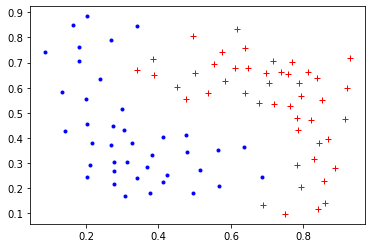

In [84]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(20,15))
plt.cla()

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, ".b")

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, "+r")

plt.show()

In [17]:
x1 = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
x2 = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])

for x1_idx, _ in enumerate(x1):
    x_idx = x1_idx
    x2_idx = x1_idx
    x[x_idx] = wtxrbf(np.array([x1[x1_idx], x2[x2_idx]])) + w0
        
print(x)

[ 2.98792733  2.81038864  3.16292589  3.36709336  3.62188737  2.8984405
  2.32257357  1.98534331  2.40826276  2.23644145  1.68286745  3.70013822
  3.82234474  4.15065116  3.59901752  1.77289699  2.0459452   2.9088836
  2.79398571  2.1350447   3.28262188  2.33147177 -0.66761389  1.06920553
  0.94396114  0.58008457  0.08310583  1.24644497 -3.02832338 -2.28575742
 -2.30961989 -2.81330013 -3.40721391 -3.7177648  -3.3451852  -2.92368741
 -1.79009357 -1.85616692 -1.78449514 -2.02014943 -2.43503243 -3.53894555
 -3.44636307 -3.29290841 -2.63890751 -2.94983089 -2.10689044 -2.62247138
 -2.88273641 -2.34098522 -2.75021871 -3.20520643 -4.22577295 -4.80785085
 -3.85772829 -3.91439404 -1.15869821 -1.05552543 -0.36087356 -0.31617601
  0.00609668  0.37191059 -0.27096906  2.43260441  2.93367258  1.86296395
  1.61480901  0.58468558 -0.38478186  1.47125922  1.63745788  2.64837813
  0.94484724 -0.38580293  0.94484074 -1.50537052 -2.04603992 -1.09594069
  0.20813075 -0.1707988  -1.05512157 -1.77784412 -2.2

In [356]:
print(max(x))
print(min(x))

7.509530781601435
-7.476930953508989


40 40


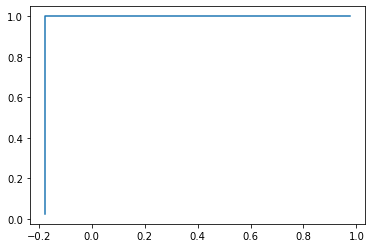

In [357]:
w1_correct = 0
w2_correct = 0

plot_x = []
plot_y = []
w1_total = sum([1 for [data] in p_val if data > 0])
w2_total = sum([1 for [data] in p_val if data > 0])
print(w1_total, w2_total)
for bias in np.arange(np.min([x]), np.max([x]), 0.1):
    y = x + bias
    #print(x, y)
    w1_correct = sum([1 for idx, _ in enumerate(y) if y[idx] > 0 and label[idx] == class_labels[0]])
    w2_correct = sum([1 for idx, _ in enumerate(y) if y[idx] < 0 and label[idx] == class_labels[1]])

    #print(w1_correct, w2_correct)
    plot_x = plot_x + [(w2_total-w2_correct) / w2_total]
    plot_y = plot_y + [w1_correct / w1_total]

plt.plot(plot_x, plot_y)   
plt.show()

In [346]:
print(p_val)

[[3.127663498985642], [3.4404298558659168], [4.489955146953692], [5.02724684939338], [5.660265929917189], [4.630472607431587], [3.839799367841154], [2.9087516753818665], [3.7212044210339474], [2.7190335568869006], [0.999982454545064], [4.497395599935119], [5.5070918936710616], [6.346931087533706], [5.716829387842411], [2.9039613798888997], [3.441894788045177], [4.568969048972834], [4.011299508873238], [2.121839980174885], [4.039985831734414], [2.2242187256272548], [0.43254936069596006], [2.2832986529049624], [1.8448862963034873], [1.0003545569509544], [1.0892047566333378], [1.5564890551097808], [-2.445145746407176], [-2.668997817527922], [-2.5962355110229662], [-2.2664858845079987], [-2.5140188398833896], [-2.7632598080460564], [-2.817766304544163], [-2.8493734027722137], [-1.823603151880631], [-2.5009474051064142], [-2.184837517124576], [-1.833084319738843], [-1.5172253747266193], [-1.9150485996994728], [-2.2665418492449287], [-2.572171801872825], [-2.6602013979515657], [-2.5507175756

In [399]:
#def naive_bayesian_classifier:

pw1 = np.sum([1 for l in label if l == class_labels[0]]) / len(dataset)
pw2 = np.sum([1 for l in label if l == class_labels[1]]) / len(dataset)

#print(pw1, pw2)

c1f1_mean = np.mean(np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[0] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]))
c1f1_var = np.var(np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[0] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]))
c1f2_mean = np.mean(np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[0] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]))
c1f2_var = np.var(np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[0] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]))

c2f1_mean = np.mean(np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[1] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]))
c2f1_var = np.var(np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[1] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]))
c2f2_mean = np.mean(np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[1] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]))
c2f2_var = np.var(np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[1] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]))

#print(class1_mean, class1_var)
#print(class2_mean, class2_var)

result = np.arange(len(dataset))
#print(result)

correct = 0
for data_idx, data in enumerate(dataset):
    pw1x = - (data[1]-c1f1_mean)*(data[1]-c1f1_mean)/2/c1f1_var - (data[2]-c1f2_mean)*(data[2]-c1f2_mean)/2/c1f2_var + math.log(pw1)
    pw2x = - (data[1]-c2f1_mean)*(data[1]-c2f1_mean)/2/c2f1_var - (data[2]-c2f2_mean)*(data[2]-c2f2_mean)/2/c2f2_var + math.log(pw2)

    result[data_idx] = class_labels[0] if pw1x > pw2x else class_labels[1]
    if result[data_idx] == label[data_idx]:
        correct = correct + 1

print("Accuracy: {}%".format(correct / len(dataset) * 100))


Accuracy: 89.65517241379311%


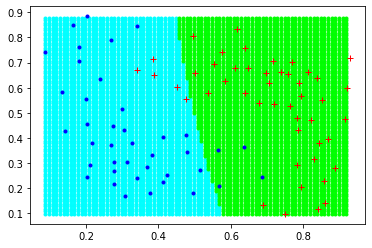

In [400]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(20,15))
plt.cla()

plot_x = np.arange(
    np.min([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]),
    np.max([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]),
    0.01)
plot_y = np.arange(
    np.min([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]),
    np.max([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]),
    0.01)

for x_point in plot_x:
    for y_point in plot_y:
        pw1x = - (x_point-c1f1_mean)*(x_point-c1f1_mean)/2/c1f1_var - (y_point-c1f2_mean)*(y_point-c1f2_mean)/2/c1f2_var + math.log(pw1)
        pw2x = - (x_point-c2f1_mean)*(x_point-c2f1_mean)/2/c2f1_var - (y_point-c2f2_mean)*(y_point-c2f2_mean)/2/c2f2_var + math.log(pw2)
        
        if pw1x > pw2x:
            plt.plot(x_point, y_point, ".", color='#00FFFF')
        else:
            plt.plot(x_point, y_point, ".", color='#00FF00')

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, ".b")

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, "+r")

plt.show()

In [421]:
#def bayesian_classifier:

pw1 = np.sum([1 for l in label if l == class_labels[0]]) / len(dataset)
pw2 = np.sum([1 for l in label if l == class_labels[1]]) / len(dataset)

#print(pw1, pw2)


c1 = np.array([
    [data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[0] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0],
    [data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[0] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]])
c1invcov = np.linalg.inv(np.cov(c1))
c2 = np.array([
    [data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[1] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0],
    [data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[1] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]])
c2invcov = np.linalg.inv(np.cov(c2))

#print(c1, c2)
#print(c1invcov, c2invcov)

result = np.arange(len(dataset))
#print(result)

correct = 0
for data_idx, data in enumerate(dataset):
    a = np.array([[data[1]-c1f1_mean, data[2]-c1f2_mean]])
    pw1x = -np.dot(np.dot(a, c1invcov), a.T)/2 + math.log(pw1)
    a = np.array([[data[1]-c2f1_mean, data[2]-c2f2_mean]])
    pw2x = -np.dot(np.dot(a, c2invcov), a.T)/2 + math.log(pw2)

    result[data_idx] = class_labels[0] if pw1x > pw2x else class_labels[1]
    if result[data_idx] == label[data_idx]:
        correct = correct + 1

print("Accuracy: {}%".format(correct / len(dataset) * 100))

Accuracy: 91.95402298850574%


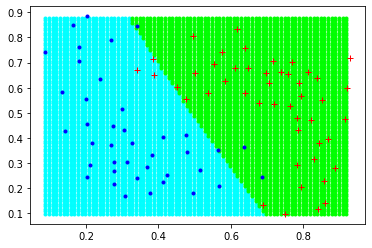

In [422]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(20,15))
plt.cla()

plot_x = np.arange(
    np.min([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]),
    np.max([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]),
    0.01)
plot_y = np.arange(
    np.min([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]),
    np.max([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]),
    0.01)

for x_point in plot_x:
    for y_point in plot_y:
        a = np.array([[x_point-c1f1_mean, y_point-c1f2_mean]])
        pw1x = -np.dot(np.dot(a, c1invcov), a.T)/2 + math.log(pw1)
        a = np.array([[x_point-c2f1_mean, y_point-c2f2_mean]])
        pw2x = -np.dot(np.dot(a, c2invcov), a.T)/2 + math.log(pw2)
        
        if pw1x > pw2x:
            plt.plot(x_point, y_point, ".", color='#00FFFF')
        else:
            plt.plot(x_point, y_point, ".", color='#00FF00')

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, ".b")

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, "+r")

plt.show()

In [428]:
#def Percepron_classifier:

w0 = 1
w1 = 1
w2 = 1
tou = 0.01
for iter in range(300):
    correct = 0
    if iter == 100 or iter == 200:
        tou = tou * 0.1
    for data_idx, data in enumerate(dataset):
        result[data_idx] = class_labels[0] if w1*data[1] + w2*data[2] + w0 > 0 else class_labels[1]
        if result[data_idx] == label[data_idx]:
            correct = correct + 1
        else:
            w1 = w1 + tou*data[1] if label[data_idx] == class_labels[0] else w1 - tou*data[1]
            w2 = w2 + tou*data[2] if label[data_idx] == class_labels[0] else w2 - tou*data[2]
            w0 = w0 + tou if label[data_idx] == class_labels[0] else w0 - tou
print("Iteration: {}, Accuracy: {}%".format(iter, correct / len(dataset) * 100))

Iteration: 299, Accuracy: 93.10344827586206%


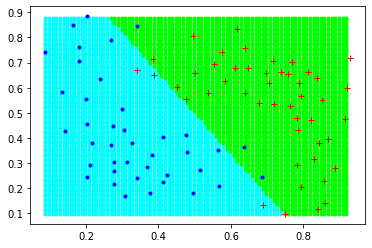

In [427]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(20,15))
plt.cla()

plot_x = np.arange(
    np.min([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]),
    np.max([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]),
    0.01)
plot_y = np.arange(
    np.min([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]),
    np.max([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]),
    0.01)

for x_point in plot_x:
    for y_point in plot_y:
        if w1*x_point + w2*y_point + w0 > 0:
            plt.plot(x_point, y_point, ".", color='#00FFFF')
        else:
            plt.plot(x_point, y_point, ".", color='#00FF00')

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, ".b")

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, "+r")

plt.show()

In [420]:
x = np.array([[0, 1, 2],
            [2, 1, 0]])
print(x)
print(np.cov(x))

[[0 1 2]
 [2 1 0]]
[[ 1. -1.]
 [-1.  1.]]


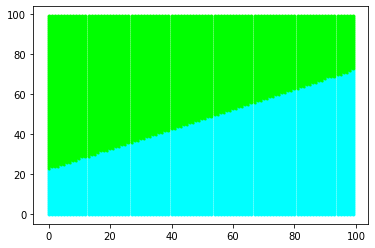

In [417]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(20,15))
plt.cla()

plot_x = np.arange(100)
plot_y = np.arange(100)

for x_point in plot_x:
    for y_point in plot_y:
        a = np.array([[x_point-60, y_point-30]])
        pw1x = -np.dot(np.dot(a, np.linalg.inv(np.array([[400, 0], [0, 200]]))), a.T)/2 + math.log(0.5)
        a = np.array([[x_point-30, y_point-60]])
        pw2x = -np.dot(np.dot(a, np.linalg.inv(np.array([[400, 0], [0, 200]]))), a.T)/2 + math.log(0.5)
        
        if pw1x > pw2x:
            plt.plot(x_point, y_point, ".", color='#00FFFF')
        else:
            plt.plot(x_point, y_point, ".", color='#00FF00')

plt.show()

In [371]:
a = np.array([[1, 2],[3, 4]])
print(a)

[[1 2]
 [3 4]]
